In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import sys
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from numpy.random import randint
from sklearn.metrics import mean_squared_error
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.metrics import auc
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import discriminant_analysis

from my_functions import make_dict

In [2]:
cd ~/Documents/GitHub/Data_Proj

C:\Users\Jackie\Documents\GitHub\Data_Proj


In [3]:
gene_corr_base = pd.read_csv('gene_corr_base.csv', index_col = None, header=None)
gene_corr_cut = pd.read_csv('gene_corr_cut.csv', index_col = None, header=None)
gene_corr_p = pd.read_csv('gene_corr_p.csv', index_col = None, header=None)
gene_names = pd.read_csv('gene_names.csv', index_col = None, header=None)
df_full = pd.read_csv('post_imputation.csv', index_col = 0)

In [4]:
df_full.head()

,CDRSB,ADAS11,ADAS13,MMSE,FAQ,MOCA,EcogSPMem,EcogSPLang,EcogSPVisspat,EcogSPPlan,...,M,update_stamp,First_DX,First_date,Final_DX,Final_date,First_Delta_Time,Final_Delta_Time,DX_Final_Progression,DX_Final_Rate
7,0.0,3.0,4.0,30.0,1.0,28.0,1.125,1.00000,1.00000,1.00,...,60,2017-10-06 23:19:46.0,0,2011-06-16,0,2015-06-02,0.0,1447.0,0.0,0.000000
14,1.5,16.0,24.0,28.0,5.0,20.0,3.250,3.66667,1.28571,2.25,...,0,2017-10-06 23:19:54.0,1,2011-08-25,2,2013-10-29,0.0,796.0,1.0,0.001256
22,0.0,7.0,8.0,28.0,0.0,21.0,1.000,1.11111,1.00000,1.00,...,0,2017-10-06 23:19:55.0,0,2011-09-13,0,2015-09-24,0.0,1472.0,0.0,0.000000
27,1.0,7.0,9.0,30.0,0.0,22.0,1.000,1.00000,1.00000,1.00,...,0,2017-10-06 23:19:55.0,1,2011-09-27,1,2012-10-02,0.0,371.0,0.0,0.000000
35,0.0,6.0,11.0,28.0,0.0,25.0,1.250,1.00000,1.00000,1.00,...,0,2017-10-06 23:19:55.0,0,2011-10-04,0,2015-10-20,0.0,1477.0,0.0,0.000000


In [5]:
# just gene expression data
X_full = df_full.iloc[:,14:49400]
X_full.head()

,11715100_at,11715101_s_at,11715102_x_at,11715103_x_at,11715104_s_at,11715105_at,11715106_x_at,11715107_s_at,11715108_x_at,11715109_at,...,AFFX-r2-TagH_at,AFFX-r2-TagIN-3_at,AFFX-r2-TagIN-5_at,AFFX-r2-TagIN-M_at,AFFX-r2-TagJ-3_at,AFFX-r2-TagJ-5_at,AFFX-r2-TagO-3_at,AFFX-r2-TagO-5_at,AFFX-r2-TagQ-3_at,AFFX-r2-TagQ-5_at
7,-0.004618,0.696194,-1.317020,0.315948,-0.034504,-0.378302,0.612318,-0.203451,-0.206527,-0.301305,...,-0.334344,-0.096450,-0.054353,0.639972,-1.911019,-0.309482,-1.040793,-0.536355,-1.040062,-0.749751
14,-1.200963,-0.476742,0.331783,1.228517,-0.655580,-0.343305,0.378144,1.305417,-1.739029,1.347586,...,-0.154246,0.594417,0.998769,0.032531,-0.757878,-1.838261,-0.209825,-0.108993,0.539111,0.087313
22,-0.419879,-0.319452,-0.338550,0.713567,-0.544255,0.125656,-0.095186,0.399328,-1.401597,1.846088,...,-0.381326,-0.711159,-0.454836,0.657837,-0.397119,1.068100,-0.025166,-0.240972,-0.780795,0.287931
27,-0.563242,0.210841,-0.192590,0.782010,-1.018851,-0.511291,-1.609842,0.215039,1.818063,-0.509470,...,-0.608406,-1.314987,0.509290,0.693569,0.105368,0.396109,-0.080563,-1.749311,0.931940,-1.510718
35,-1.922725,-1.231736,-1.333238,-1.043128,-0.456367,0.650612,-0.289500,-2.088576,0.074666,-1.265440,...,-0.905960,-0.787317,-1.389296,-0.414116,-0.197413,0.152512,-0.966929,0.645177,0.067716,-0.888108


In [6]:
corrs_df = pd.DataFrame()
corrs_df['Gene_Name'] = gene_names[0]
corrs_df['Base'] = gene_corr_base[0]/15
corrs_df['Cut'] = gene_corr_cut[0]/15
corrs_df['p'] = gene_corr_p[0]/15
corrs_df.sort_values('p').head(20)

,Gene_Name,Base,Cut,p
42374,11757474_x_at,0.234427,0.234427,0.000019
31151,11746251_x_at,0.212479,0.212479,0.000037
6909,11722009_a_at,0.198839,0.198839,0.000216
47835,11762935_x_at,0.187445,0.187445,0.000357
15665,11730765_at,0.174991,0.174991,0.000755
10789,11725889_at,0.166186,0.166186,0.000824
7203,11722303_x_at,0.169622,0.169622,0.000936
4518,11719618_a_at,0.161189,0.161189,0.001258
26090,11741190_a_at,0.160000,0.160000,0.001670
6810,11721910_at,0.160999,0.160999,0.001846


In [7]:
Used = corrs_df[corrs_df.p < 0.01]
used_genes = list(Used.Gene_Name.values)

In [8]:
def for_loop_status(length, index = 0):
    sys.stdout.write('\r%f%%' % ((index/length)*100))
    sys.stdout.flush()
    index += 1
    return(index)

def for_loop_status2(length, length2, index = 0, index2 = 0):
    sys.stdout.write('\r%f%% of %f%%' % ((index/length)*100, (index2/length2)*100))
    sys.stdout.flush()
    index += 1
    index2 += 1
    return(index, index2)

In [9]:
# interaction and polynomial terms
predictors_expo_list = []
for_index = 0
index = 0
for predictor in used_genes:
    for_index = for_loop_status(len(used_genes), for_index)
    predictors_temp_list = []
    for expo in [2,3,4]:
        #if expo = 2 and the predictor is atemp, then you'll get "atemp2" which is atemp^2
        predictors_temp_list.append('{0}{1}'.format(predictor, expo))
        df_full['{0}{1}'.format(predictor, expo)] = df_full['{0}'.format(predictor)]**int('{0}'.format(expo))
    predictors_expo_list.append(predictors_temp_list)
    for predictor2 in used_genes[int(index + 1):]:
        if predictor != predictor2:
            df_full['{0}_x_{1}'.format(predictor, predictor2)] = df_full['{0}'.format(predictor)] * df_full['{0}'.format(predictor2)]
    index += 1

99.481865%

In [10]:
# find index of first polynomial term
firstpoly = df_full.columns.get_loc('DX_Final_Rate') + 1
df_full.columns[firstpoly:]

Index(['11715176_at2', '11715176_at3', '11715176_at4',
       '11715176_at_x_11715574_a_at', '11715176_at_x_11715665_a_at',
       '11715176_at_x_11716095_s_at', '11715176_at_x_11716149_a_at',
       '11715176_at_x_11716279_x_at', '11715176_at_x_11716702_a_at',
       '11715176_at_x_11717003_s_at',
       ...
       '11762935_x_at4', '11762935_x_at_x_11762998_x_at',
       '11762935_x_at_x_200064_PM_at', '11762998_x_at2', '11762998_x_at3',
       '11762998_x_at4', '11762998_x_at_x_200064_PM_at', '200064_PM_at2',
       '200064_PM_at3', '200064_PM_at4'],
      dtype='object', length=19107)

In [11]:
df_full_removed = df_full[df_full['DX_Final_Progression'] != 0]
df_full = df_full[df_full['DX_Final_Progression'] == 0]

In [12]:
temp_genes = used_genes.copy()
#significant genes and new poly/interaction terms
full_genes = temp_genes + list(df_full.columns[firstpoly:].values)
X_full = df_full[full_genes]
y_full = df_full['DX']

In [13]:
# split into train and test
np.random.seed(9001)
msk = np.random.rand(len(X_full)) < 0.5

X_train = X_full[msk]
X_test = X_full[~msk]
y_train = y_full[msk]
y_test = y_full[~msk]

# PCA

In [14]:
pre_X_train = X_full[msk]
pre_X_test = X_full[~msk]
pre_y_train = y_full[msk]
pre_y_test = y_full[~msk]

pre_X_train['class'] = pre_y_train
pre_X_test['class'] = pre_y_test

C:\Users\Jackie\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Jackie\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [15]:
# PCA with all components
pca_full_fit = PCA()
pca_full = {}
pca_full['Xtrain'] = pca_full_fit.fit_transform(pre_X_train)

# find number of components that explain 90% of predictor variance
n_components = (np.argwhere((np.cumsum(pca_full_fit.explained_variance_ratio_)) > 0.9)[0] + 1)[0]

# PCA with n_components
pca90 = {}
pca90_fit = PCA(n_components)
pca90_fit.fit(pre_X_train)
X_train = pca90_fit.transform(pre_X_train)
X_test = pca90_fit.transform(pre_X_test)
y_train = pre_y_train
y_test = pre_y_test

In [16]:
# random classifier
rand = {}
rand['train_pred'] = randint(3, size = len(X_train))
rand['test_pred'] = randint(3, size = len(X_test))

# AdaBoost with PCA and CV

In [23]:
from collections import OrderedDict
from sklearn.model_selection import GridSearchCV

param_dict = OrderedDict(
    n_estimators = range(1,20),
    learning_rate = np.arange(0.05,1,0.05)
)

est = AdaBoostClassifier(random_state = 9001)
gb_cv = GridSearchCV(est, param_grid = param_dict, cv=3, n_jobs=-1)
gb_cv.fit(X_train, y_train)
gb_cv.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.60000000000000009, n_estimators=19,
          random_state=9001)

In [24]:
print('AdaBoost with PCA & CV, train: ', accuracy_score(y_train, gb_cv.best_estimator_.fit(X_train, y_train).predict(X_train)))
print('AdaBoost with PCA & CV, test: ', accuracy_score(y_test, gb_cv.best_estimator_.fit(X_train, y_train).predict(X_test)))
print('Random class. accuracy, train: ', accuracy_score(y_train, rand['train_pred']))
print('Random class. accuracy, test: ', accuracy_score(y_test, rand['test_pred']))

AdaBoost with PCA & CV, train:  0.664705882353
AdaBoost with PCA & CV, test:  0.421052631579
Random class. accuracy, train:  0.264705882353
Random class. accuracy, test:  0.310526315789


# Logistic Regression, Discriminant Analysis, kNN

In [25]:
# fit logistic regression model
lin_class = {}
lin_class['logit_ovr'] = LogisticRegressionCV(Cs=7, penalty='l2', random_state = 9001, multi_class='ovr')
lin_class['logit_ovr'].fit(X_train, y_train)

# classify
lin_class['logit_ovr_train'] = lin_class['logit_ovr'].predict(X_train)
lin_class['logit_ovr_test'] = lin_class['logit_ovr'].predict(X_test)

# fit logistic regression model
lin_class['logit_multinomial'] = LogisticRegressionCV(Cs=7, penalty='l2', random_state = 9001, multi_class='multinomial')
lin_class['logit_multinomial'].fit(X_train, y_train)

# classify
lin_class['logit_multinomial_train'] = lin_class['logit_multinomial'].predict(X_train)
lin_class['logit_multinomial_test'] = lin_class['logit_multinomial'].predict(X_test)

# LDA
lda = {}
lda['model'] = discriminant_analysis.LinearDiscriminantAnalysis()
lda['model'].fit(X_train, y_train)
lda['train_pred'] = lda['model'].predict(X_train)
lda['test_pred'] = lda['model'].predict(X_test)

# QDA
qda = {}
qda['model'] = discriminant_analysis.QuadraticDiscriminantAnalysis()
qda['model'].fit(X_train, y_train)
qda['train_pred'] = qda['model'].predict(X_train)
qda['test_pred'] = qda['model'].predict(X_test)

#Fit a knn model
knn = {}

# knn cv code from https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/#parameter-tuning-with-cross-validation
knn['cv_scores'] = []
knn['neighbours'] = list(range(1,50))
for k in knn['neighbours']:
    current_model = KNN(n_neighbors=k)
    scores = cross_val_score(current_model, X_train, y_train, cv=10, scoring='accuracy')
    knn['cv_scores'].append(scores.mean())
knn['MSE'] = [1 - x for x in knn['cv_scores']]
# determining best k
knn['optimal_k'] = knn['neighbours'][knn['MSE'].index(min(knn['MSE']))]

knn['model'] = KNN(n_neighbors=knn['optimal_k'])
knn['model'].fit(X_train, y_train)
knn['train_pred'] = knn['model'].predict(X_train)
knn['test_pred'] = knn['model'].predict(X_test)

C:\Users\Jackie\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:695: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [26]:
# print all classification accuracies
print('Logistic OvR class. accuracy, train: ', accuracy_score(y_train, lin_class['logit_ovr_train']))
print('Logistic OvR class. accuracy, test: ', accuracy_score(y_test, lin_class['logit_ovr_test']))
print('Logistic multinomial class. accuracy, train: ', accuracy_score(y_train, lin_class['logit_multinomial_train']))
print('Logistic multinomial class. accuracy, test: ', accuracy_score(y_test, lin_class['logit_multinomial_test']))
print('LDA class. accuracy, train: ', accuracy_score(y_train, lda['train_pred']))
print('LDA class. accuracy, test: ', accuracy_score(y_test, lda['test_pred']))
print('QDA class. accuracy, train: ', accuracy_score(y_train, qda['train_pred']))
print('QDA class. accuracy, test: ', accuracy_score(y_test, qda['test_pred']))
print('KNN class. accuracy, train: ', accuracy_score(y_train, knn['train_pred']))
print('KNN class. accuracy, test: ', accuracy_score(y_test, knn['test_pred']))
print('Random class. accuracy, train: ', accuracy_score(y_train, rand['train_pred']))
print('Random class. accuracy, test: ', accuracy_score(y_test, rand['test_pred']))

Logistic OvR class. accuracy, train:  0.635294117647
Logistic OvR class. accuracy, test:  0.468421052632
Logistic multinomial class. accuracy, train:  0.770588235294
Logistic multinomial class. accuracy, test:  0.347368421053
LDA class. accuracy, train:  0.611764705882
LDA class. accuracy, test:  0.473684210526
QDA class. accuracy, train:  0.888235294118
QDA class. accuracy, test:  0.426315789474
KNN class. accuracy, train:  0.723529411765
KNN class. accuracy, test:  0.421052631579
Random class. accuracy, train:  0.264705882353
Random class. accuracy, test:  0.310526315789


## Decision Tree CV for max depth

In [27]:
df_train = pd.read_csv('Xtrain.csv')
df_test = pd.read_csv('Xtest.csv')

In [28]:
orig_names = df_train.columns.values
for value in orig_names:
    if value[0] == ' ':
        df_train = df_train.rename(columns = {value: value[1:]})
        df_test = df_test.rename(columns = {value: value[1:]})

In [29]:
# extract matrices from dataframe
dtrain_X_full = df_train.drop('class', axis = 1)
#dtrain_X = df_train.iloc[:, :-8]
dtest_X_full = df_test.drop('class', axis = 1)
#dtest_X = df_test.iloc[:, :-8]

dt_class = {}
dt_class['Xtrain'] = dtrain_X_full.values
dt_class['Xtest'] = dtest_X_full.values
dt_class['ytrain'] = df_train['class'].values
dt_class['ytest'] = df_test['class'].values

Optimal tree depth is 9 with 0.347324 accuracy
Tree class. accuracy, train:  1.0
Tree class. accuracy, test:  0.363157894737


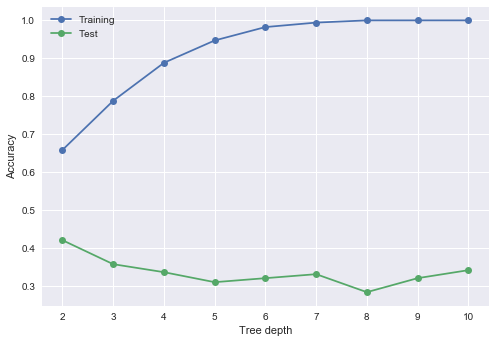

In [30]:
# plot training and test accuracies as function of tree depth
dt = {}
depths = list(range(2,11))
train_scores = []
test_scores = []
for i in depths:
    dt[str(i)] = DecisionTreeClassifier(max_depth = i)
    dt[str(i)].fit(dt_class['Xtrain'], dt_class['ytrain'])
    train_scores.append(dt[str(i)].score(dt_class['Xtrain'], dt_class['ytrain']))
    test_scores.append(dt[str(i)].score(dt_class['Xtest'], dt_class['ytest']))
plt.plot(depths, train_scores, "o-", label = "Training")
plt.plot(depths, test_scores, "o-", label = "Test")
plt.xlabel("Tree depth")
plt.ylabel("Accuracy")
plt.legend(loc='best')

# use 5-fold cross validation to find optimal tree depth
cv_scores = []
for i in depths:
    cv_scores.append(np.mean(cross_val_score(dt[str(i)], dt_class["Xtrain"], dt_class["ytrain"], cv=5)))
    cv_max = max(cv_scores)
    opt_depth = depths[cv_scores.index(cv_max)]
print("Optimal tree depth is %d with %f accuracy" %(opt_depth, cv_max))
max_depth = opt_depth

# refit tree w/optimal tree depth
cv_dt = DecisionTreeClassifier(max_depth = opt_depth)
cv_dt.fit(dt_class["Xtrain"], dt_class["ytrain"])

print('Tree class. accuracy, train: ', accuracy_score(dt_class["ytrain"], cv_dt.predict(dt_class['Xtrain'])))
print('Tree class. accuracy, test: ', accuracy_score(dt_class["ytest"], cv_dt.predict(dt_class['Xtest'])))